In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd

import os
import random
import shutil
import pathlib

from keras_preprocessing.image import ImageDataGenerator

# Training Data Preparation

In [2]:
def create_folder_structure():
    shutil.rmtree('./train', ignore_errors=True)
    pathlib.Path("./train/train/dogs").mkdir(parents=True, exist_ok=True)
    pathlib.Path("./train/train/cats").mkdir(parents=True, exist_ok=True)
    pathlib.Path("./train/validate/dogs").mkdir(parents=True, exist_ok=True)
    pathlib.Path("./train/validate/cats").mkdir(parents=True, exist_ok=True)


def copy_images(source_list, destination_path):
    for image in source_list:
        shutil.copyfile(f'./input_data/{image}', f'./train/{destination_path}/{image}')

In [3]:
def create_training_and_validation_set(train_validation_split, sample_cnt):
    cat_and_dog_images = os.listdir('./input_data')

    cat_images = list(filter(lambda image: 'cat' in image, cat_and_dog_images))
    cat_images = random.sample(cat_images, sample_cnt)
    dog_images = list(filter(lambda image: 'dog' in image, cat_and_dog_images))
    dog_images = random.sample(dog_images, sample_cnt)

    random.shuffle(cat_images)
    random.shuffle(dog_images)

    split_index = int(len(cat_images) * train_validation_split)

    training_cats = cat_images[:split_index]
    validation_cats = cat_images[split_index:]
    training_dogs = dog_images[:split_index]
    validation_dogs = dog_images[split_index:]

    create_folder_structure()
    copy_images(training_dogs, 'train/dogs')
    copy_images(training_cats, 'train/cats')
    copy_images(validation_dogs, 'validate/dogs')
    copy_images(validation_cats, 'validate/cats')

In [4]:
create_training_and_validation_set(0.8, 1000)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [10]:
img = mpimg.imread('train/train/dogs/dog.9650.jpg')
print(img.shape)
# print(img)

(468, 500, 3)


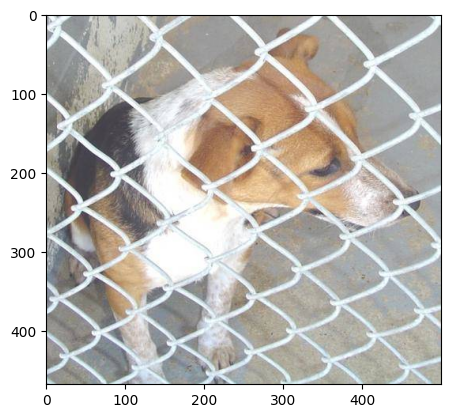

In [11]:
imgplot = plt.imshow(img)

In [12]:
img = mpimg.imread('train/train/cats/cat.9458.jpg')
print(img.shape)
# print(img)

(333, 499, 3)


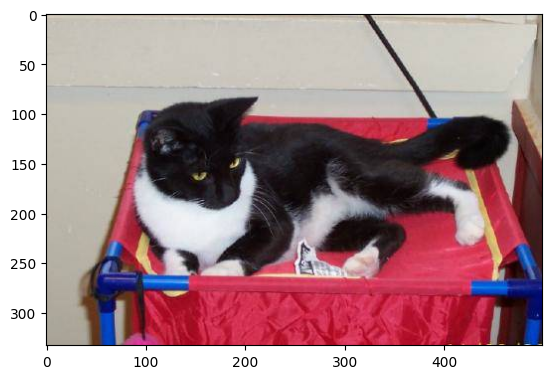

In [13]:
imgplot = plt.imshow(img)

# Train Model

In [14]:
def train_model():
    train_gen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_iterator = train_gen.flow_from_directory('./train/train',
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

    validation_gen = ImageDataGenerator(rescale=1. / 255.0)
    validation_iterator = validation_gen.flow_from_directory('./train/validate',
                                                             target_size=(150, 150),
                                                             batch_size=10,
                                                             class_mode='binary')

    model = keras.models.Sequential([
        keras.layers.Conv2D(16, (3, 3), activation=tf.nn.relu, input_shape=(150, 150, 3)),
        keras.layers.MaxPool2D((2, 2)),
        #keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
        #keras.layers.MaxPool2D((2, 2)),
        #keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
        #keras.layers.MaxPool2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=512, activation=tf.nn.relu),
        keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])

    model.compile(optimizer=tf.optimizers.Adam(),
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy'])

    history = model.fit(train_iterator,
                        validation_data=validation_iterator,
                        steps_per_epoch=50,
                        epochs=20,
                        validation_steps=25)

    model.save('dogs-vs-cats.h5')

    return history

In [15]:
result_history = train_model()

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Metal device set to: Apple M1 Max


2022-11-12 20:52:47.999734: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-12 20:52:47.999922: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20


2022-11-12 20:52:48.225369: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-12 20:52:48.377345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 2.9119 - accuracy: 0.4990

2022-11-12 20:52:52.312570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 5s 85ms/step - loss: 2.9119 - accuracy: 0.4990 - val_loss: 0.7231 - val_accuracy: 0.5280
Epoch 2/20
50/50 [==============================] - 4s 80ms/step - loss: 0.7060 - accuracy: 0.5310 - val_loss: 0.6407 - val_accuracy: 0.6160
Epoch 3/20
50/50 [==============================] - 4s 82ms/step - loss: 0.6750 - accuracy: 0.5680 - val_loss: 0.6314 - val_accuracy: 0.6000
Epoch 4/20
50/50 [==============================] - 4s 81ms/step - loss: 0.6641 - accuracy: 0.5880 - val_loss: 0.7789 - val_accuracy: 0.5440
Epoch 5/20
50/50 [==============================] - 4s 82ms/step - loss: 0.6864 - accuracy: 0.5540 - val_loss: 0.6594 - val_accuracy: 0.6080
Epoch 6/20
50/50 [==============================] - 4s 80ms/step - loss: 0.6709 - accuracy: 0.5860 - val_loss: 0.6387 - val_accuracy: 0.6320
Epoch 7/20
50/50 [==============================] - 4s 77ms/step - loss: 0.6583 - accuracy: 0.6080 - val_loss: 0.6752 - val_accuracy: 0.5960
Epoch 8/20
50/50 [======

In [16]:
def plot_result(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

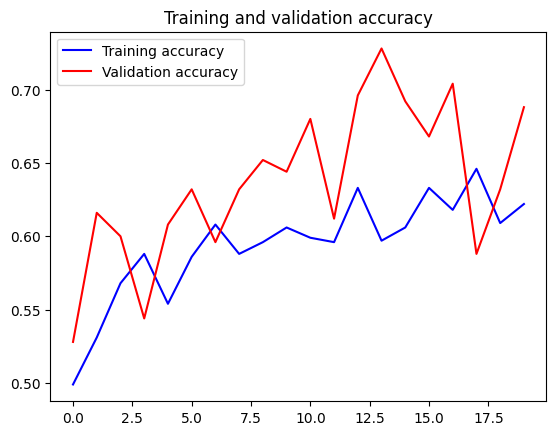

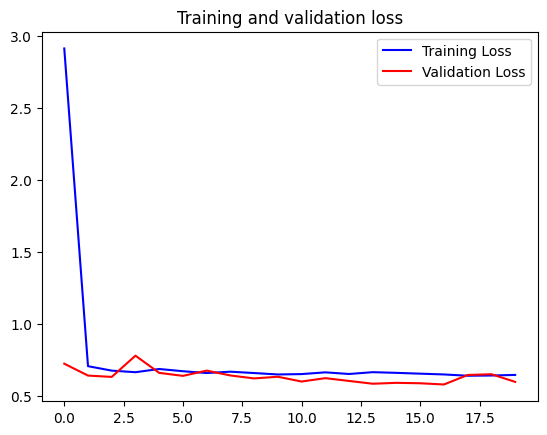

In [17]:
plot_result(result_history)